### Import Liberies

In [9]:
!pip install deeprobust

%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from networkx.generators.random_graphs import erdos_renyi_graph
from networkx.generators.random_graphs import barabasi_albert_graph
from networkx.generators.community import stochastic_block_model
from networkx.generators.random_graphs import watts_strogatz_graph
from networkx.generators.community import random_partition_graph

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import math
from tqdm import tqdm
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

import numpy as np

import random
from deeprobust.graph.data import Dataset

import solvers_implt as solvers

8415.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/tmp/ipykernel_147700/1489053705.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### Import Datasets


In [7]:
dataset_name = 'polblogs' #other datatsets : 'citeseer' , 'polblogs' , 'acm','cora'

ori_nodes = 1490 #original number of nodes.
## citeseer : 3312
## cora     : 2708
## polblogs : 1490
## acm      : 3025

data = Dataset(root='', name=dataset_name, setting='gcn',seed=10)
adj, features, labels = data.adj, data.features, data.labels
idx_train, idx_val, idx_test = data.idx_train, data.idx_val, data.idx_test

A = np.array(adj.todense()) # Adjacency matrix
X=np.array(features.todense()) # node featutrs \ graph signal
np.save("A.npy", A)
#print(A)
#np.save("X.npy", X)
#print(X)

b=np.ones(ori_nodes)

z=A@b
D=np.diag(z)
L=D-A
#print(L)

U, S, Vh = np.linalg.svd(L, hermitian=True)

eigenvalues, eigenvectors = np.linalg.eigh(L)
#eigenvalues = np.real(eigenvalues)
#idx = np.argsort(S)[::-1]
#print(eigenvalues) 

r=0.25
k = round(r*ori_nodes) # Coarsened graph's number of nodes i.e. k = r*ori_nodes
U_k=U[:,:k] # column on U 



Loading polblogs dataset...


 ### Run algorithms

In [8]:
overall_loss = []
overall_loss_my = []
iterations = 15 # Number of iterations our objective function will run.
#print("Shape of the data matrix (p x n): ", X_now.shape)

# Hyperparameters: lambda, beta, alpha, gamma
lambda_base = 500
beta_base = 0
alpha_base = 500
gamma_base = X.shape[1]/2

obj = solvers.solver_v2(L, X, k, lambda_base, beta_base, alpha_base, gamma_base) 
C_0, X_t_0, loss_ls = obj.fit(iterations)
overall_loss.extend(loss_ls)

#lambda_my = 500
#beta_my = 0
#alpha_my = 500
#gamma_my = X.shape[1]/2

#obj_my = solvers.my_method(L, X, k, lambda_my, beta_my, alpha_my, gamma_my, U_k)

#C_0_my, X_t_0_my, loss_ls_my = obj_my.fit(iterations)
#overall_loss_my.extend(loss_ls_my)



  7%|▋         | 1/15 [00:11<02:43, 11.70s/it]

 FGC  (XLX)
46.16694140502796
 FGC  (gamma)
-680528.6668377243
 FGC  (alpha)
363374.415230701
 FGC  (lambda)
372500.0


 13%|█▎        | 2/15 [00:23<02:31, 11.62s/it]

 FGC  (XLX)
25972.44621725029
 FGC  (gamma)
1137900.3631203119
 FGC  (alpha)
339759.9839003856
 FGC  (lambda)
372500.0


 20%|██        | 3/15 [00:34<02:18, 11.56s/it]

 FGC  (XLX)
30920.839491830942
 FGC  (gamma)
1191931.3734388205
 FGC  (alpha)
382959.7812721854
 FGC  (lambda)
372500.0


 27%|██▋       | 4/15 [00:46<02:06, 11.50s/it]

 FGC  (XLX)
32229.69371384142
 FGC  (gamma)
1204651.589560953
 FGC  (alpha)
399934.95423234085
 FGC  (lambda)
372500.0


 27%|██▋       | 4/15 [00:47<02:10, 11.86s/it]


KeyboardInterrupt: 

In [ ]:
overall_loss_my = []

lambda_my_2 = 500
beta_my_2 = 0
alpha_my_2 = 500
gamma_my_2 = X.shape[1]/2

obj_my_2 = solvers.my_method_v2(L, X, k, lambda_my_2, beta_my_2, alpha_my_2, gamma_my_2, U_k)

C_0_my, X_t_0_my, loss_ls_my = obj_my_2.fit(iterations)
overall_loss_my.extend(loss_ls_my)

  0%|          | 0/15 [00:00<?, ?it/s]

 my  (ev)
1.786873737189297
 my  (alpha)
374394.9923894264
 my  (lambda)
372500.0
 my  new


  7%|▋         | 1/15 [01:24<19:43, 84.54s/it]

276.40641148851574
 my  (ev)
301.1234807261792
 my  (alpha)
617694.3334667289
 my  (lambda)
372500.0
 my  new


 13%|█▎        | 2/15 [02:48<18:17, 84.41s/it]

464.67185219425187
 my  (ev)
356.69081130668894
 my  (alpha)
688058.4090606958
 my  (lambda)
372500.0
 my  new


 20%|██        | 3/15 [04:13<16:51, 84.32s/it]

562.6539353459167
 my  (ev)
368.1741562276692
 my  (alpha)
710827.1785520568
 my  (lambda)
372500.0
 my  new


 27%|██▋       | 4/15 [05:37<15:28, 84.45s/it]

585.5679682933819
 my  (ev)
370.29152936230196
 my  (alpha)
714885.222961036
 my  (lambda)
372500.0
 my  new


 33%|███▎      | 5/15 [07:02<14:06, 84.68s/it]

589.811516413369
 my  (ev)
371.86344816375447
 my  (alpha)
713554.9835755173
 my  (lambda)
372500.0
 my  new


 40%|████      | 6/15 [08:27<12:42, 84.77s/it]

591.4768810161944
 my  (ev)
372.13236263357305
 my  (alpha)
710749.7723716482
 my  (lambda)
372500.0
 my  new


 47%|████▋     | 7/15 [09:52<11:17, 84.70s/it]

591.8634735223949
 my  (ev)
372.13258258289983
 my  (alpha)
707186.1965113413
 my  (lambda)
372500.0
 my  new


 53%|█████▎    | 8/15 [11:16<09:52, 84.65s/it]

591.7602296979779
 my  (ev)
372.13266535969103
 my  (alpha)
703741.0087700974
 my  (lambda)
372500.0
 my  new


 60%|██████    | 9/15 [12:41<08:28, 84.67s/it]

591.6600081805884
 my  (ev)
372.132672515029
 my  (alpha)
699978.5076073336
 my  (lambda)
372500.0
 my  new


 67%|██████▋   | 10/15 [14:06<07:03, 84.69s/it]

591.495963248893
 my  (ev)
372.13268075843393
 my  (alpha)
696255.0411692396
 my  (lambda)
372500.0


 73%|███████▎  | 11/15 [15:28<05:35, 83.89s/it]

 my  new
591.3162860530224
 my  (ev)
372.1327023689213
 my  (alpha)
692583.5869268231
 my  (lambda)
372500.0
 my  new


 80%|████████  | 12/15 [16:47<04:07, 82.51s/it]

591.1212222844536
 my  (ev)
372.13276023003795
 my  (alpha)
688969.9428504541
 my  (lambda)
372500.0
 my  new


 87%|████████▋ | 13/15 [18:07<02:43, 81.69s/it]

590.9123712886357
 my  (ev)
372.1329255277639
 my  (alpha)
685457.1947177983
 my  (lambda)
372500.0
 my  new


 93%|█████████▎| 14/15 [19:27<01:21, 81.02s/it]

590.6986338765944
 my  (ev)
372.13302030763816
 my  (alpha)
681979.5618812407
 my  (lambda)
372500.0000000001
 my  new


100%|██████████| 15/15 [20:46<00:00, 83.12s/it]

590.4602882038673


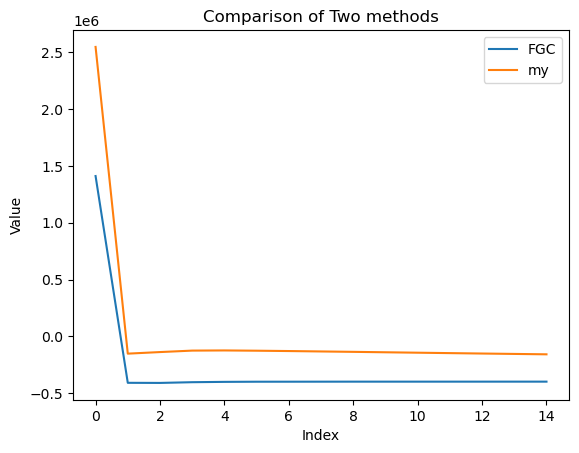

In [ ]:
import matplotlib.pyplot as plt

plt.plot(overall_loss, label='FGC')

# Create a plot for the second list
plt.plot(overall_loss_my, label='my')

# Add title, labels, and legend
plt.title('Comparison of Two methods')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

### Performance measures - REE ,DE, 


 FGC eigen_error  (REE)
(0.1747731973386877+0j)
 my eigen_error  (REE)
(0.21153370855795733+0j)


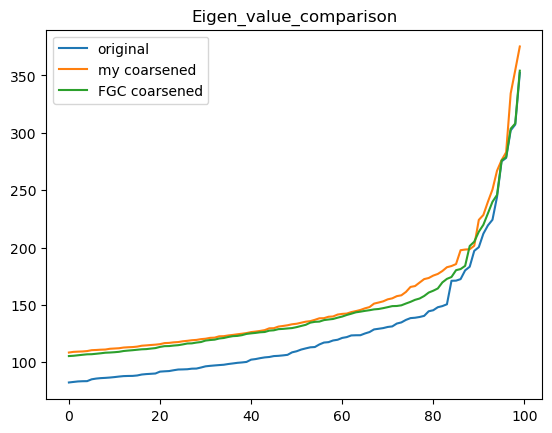

In [ ]:

# compare C_0 (FGC), C_0_my
eigen_values,eigenvectors=np.linalg.eig(L)

eigen_values_all=np.sort(eigen_values)

FGC_eigen_values,FGC_eigenvector=np.linalg.eig(C_0.T@L@C_0)
my_eigen_values,FGC_eigenvector=np.linalg.eig(C_0_my.T@L@C_0_my)

FGC_eigen_values_all=np.sort(FGC_eigen_values)
my_eigen_values_all=np.sort(my_eigen_values)


eigen_values_k=eigen_values_all[-100:] # take the biggest k eigenvalues
FGC_eigen_values_k=FGC_eigen_values_all[-100:]
my_eigen_values_k=my_eigen_values_all[-100:]

temp_FGC=0
temp_my=0

for j in range(len(eigen_values_k)):
  temp_FGC=temp_FGC+(abs(FGC_eigen_values_k[j]-eigen_values_k[j])/eigen_values_k[j])
  temp_my=temp_my+(abs(my_eigen_values_k[j]-eigen_values_k[j])/eigen_values_k[j])
eigenerror_FGC=temp_FGC/len(eigen_values_k)
eigenerror_my=temp_my/len(eigen_values_k)

print(" FGC eigen_error  (REE)")
print(eigenerror_FGC)
print(" my eigen_error  (REE)")
print(eigenerror_my)


plt.plot(eigen_values_k, label="original")
plt.plot(my_eigen_values_k, label="my coarsened")
plt.plot(FGC_eigen_values_k, label="FGC coarsened")
plt.title('Eigen_value_comparison')
plt.legend()
plt.show()


### Hyperbolic Error 

In [ ]:
def HE(u,v):
    return np.arccosh(1+((pow(np.linalg.norm((u-v)@X),2)*pow(np.linalg.norm(X),2))/(2*np.trace(X.T@u@X)*np.trace(X.T@v@X))))

In [ ]:
P_0=np.linalg.pinv(C_0)
P_0_my=np.linalg.pinv(C_0_my)


L_FGC=P_0.T@C_0.T@L@C_0@P_0
L_my=P_0_my.T@C_0_my.T@L@C_0_my@P_0_my
FGC_HE_error=HE(L_FGC,L)
my_HE_error=HE(L_my,L)


print(" FGC Hyperbolic Error  (HE)")
print(FGC_HE_error)
print(" my Hyperbolic Error  (HE)")
print(my_HE_error)

 FGC Hyperbolic Error  (HE)
1.6480604078589611
 my Hyperbolic Error  (HE)
1.946167825638518


In [ ]:
LL_FGC=(L-L_FGC)
LL_my=(L-L_my)

FGC_RE_error=np.log(pow(np.linalg.norm(LL_FGC),2)/k)
my_RE_error=np.log(pow(np.linalg.norm(LL_my),2)/k)

print(" Reconstruction Error  (RE)")
print(FGC_RE_error)
print(" Reconstruction Error  (RE)")
print(my_RE_error)

 Reconstruction Error  (RE)
8.123891817502154
 Reconstruction Error  (RE)
8.427473015667339


In [ ]:
C_0_new=np.zeros(C_0.shape)
C_0_my_new=np.zeros(C_0.shape)


for i in range(C_0.shape[0]):
    C_0_new[i][np.argmax(C_0[i])]=1
    C_0_my_new[i][np.argmax(C_0_my[i])]=1

test=C_0_my_new.T@C_0_my_new
test2=C_0_new.T@C_0_new

In [ ]:

P_0_new=np.linalg.pinv(C_0_new)
P_0_my_new=np.linalg.pinv(C_0_my_new)


L_FGC_new=P_0_new.T@C_0_new.T@L@C_0_new@P_0_new
L_my_new=P_0_my_new.T@C_0_my_new.T@L@C_0_my_new@P_0_my_new
FGC_HE_error=HE(L_FGC_new,L)
my_HE_error=HE(L_my_new,L)


print(" FGC Hyperbolic Error  (HE)")
print(FGC_HE_error)
print(" my Hyperbolic Error  (HE)")
print(my_HE_error)

LL_FGC=(L-L_FGC_new)
LL_my=(L-L_my_new)

FGC_RE_error=np.log(pow(np.linalg.norm(LL_FGC),2)/k)
my_RE_error=np.log(pow(np.linalg.norm(LL_my),2)/k)

print(" Reconstruction Error  (RE)")
print(FGC_RE_error)
print(" Reconstruction Error  (RE)")
print(my_RE_error)

 FGC Hyperbolic Error  (HE)
1.64806040801807
 my Hyperbolic Error  (HE)
1.9461678258932442
 Reconstruction Error  (RE)
8.123891817630227
 Reconstruction Error  (RE)
8.427473015826822


### DE and INP

In [ ]:
#X = np.asarray(X, dtype=np.float64)
norms = np.linalg.norm(X, axis=0)
norms[norms == 0] = 1
X_n = X / norms

norms = np.linalg.norm(X_t_0, axis=0)
norms[norms == 0] = 1
X_t_0_n = X_t_0 / norms

norms = np.linalg.norm(X_t_0_my, axis=0)
norms[norms == 0] = 1
X_t_0_my_n = X_t_0_my / norms

DE_FGC = np.trace(X_t_0_n.T@C_0_new.T@L@C_0_new@X_t_0_n)
DE_orig= np.trace(X_n.T@L@X_n)
DE_my = np.trace(X_t_0_my_n.T@C_0_my_new.T@L@C_0_my_new@X_t_0_my_n)
print(DE_orig)
print(DE_FGC)
print(DE_my)

INP_FGC=np.linalg.norm(X_n.T@L@X_n-(X_t_0_n.T@C_0_new.T@L@C_0_new@X_t_0_n))
INP_my=np.linalg.norm(X_n.T@L@X_n-(X_t_0_my_n.T@C_0_my_new.T@L@C_0_my_new@X_t_0_my_n))
print(INP_FGC)
print(INP_my)

33430.0
126012.24578370692
133783.02296994743
10884.57842827487
8446.217907615277


In [ ]:
norms = np.linalg.norm(X_t_0_my, axis=0)
X_t_0_my = X_t_0_my / norms.T
